<a href="https://colab.research.google.com/github/SebasMore07/Se-ales-y-Sistemas/blob/main/Copia_de_Parcial1_SyS_2024_2(Sebastian_Moreno_Rincon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

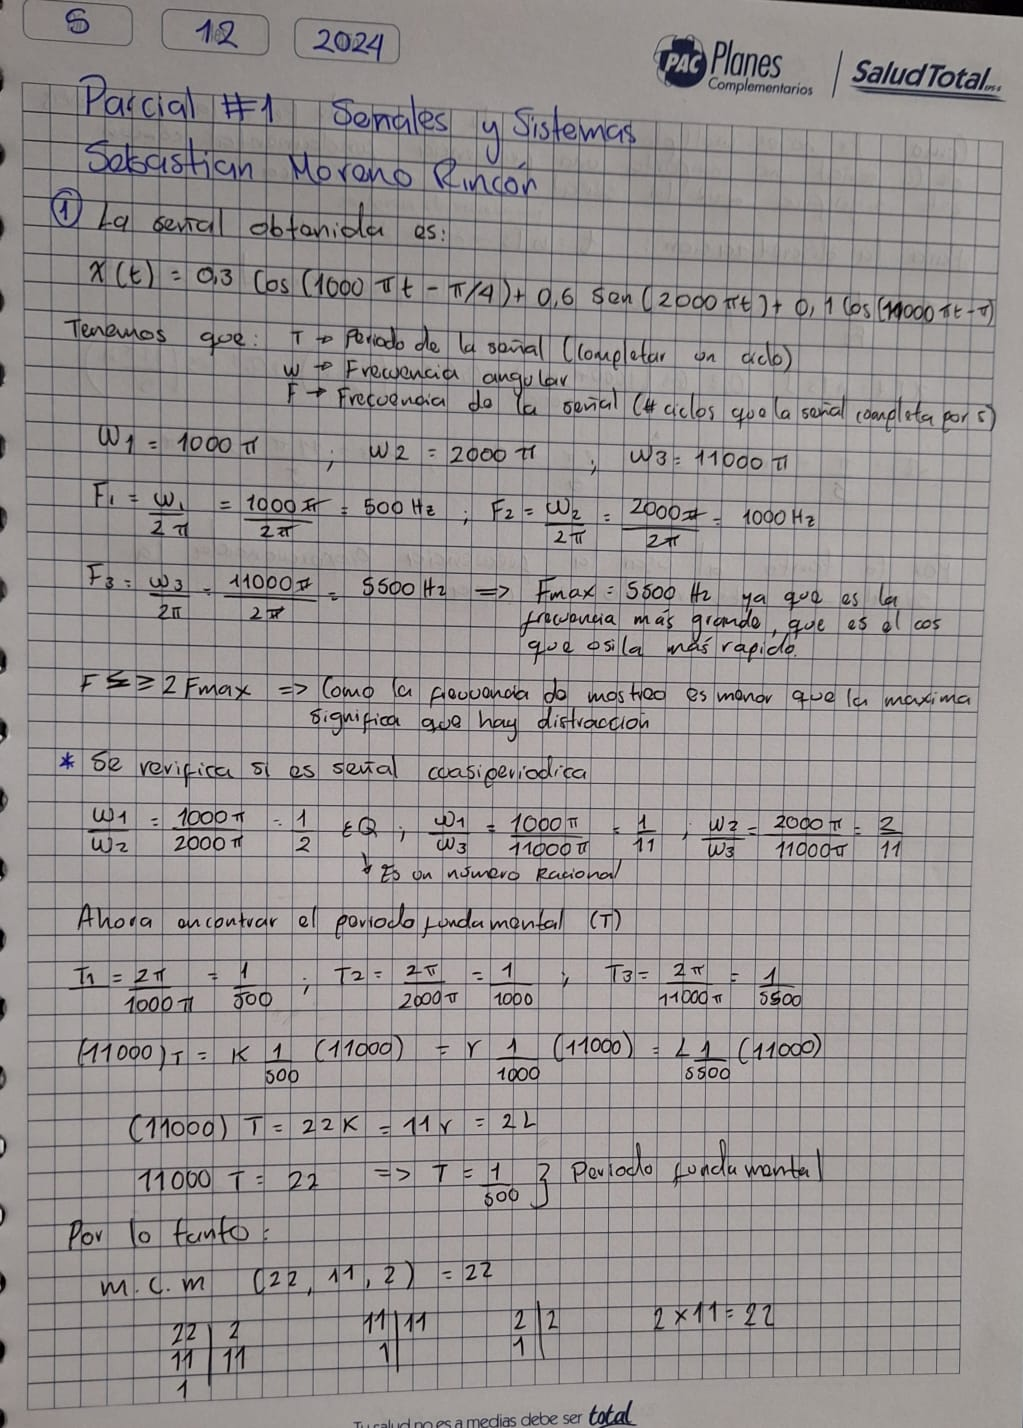

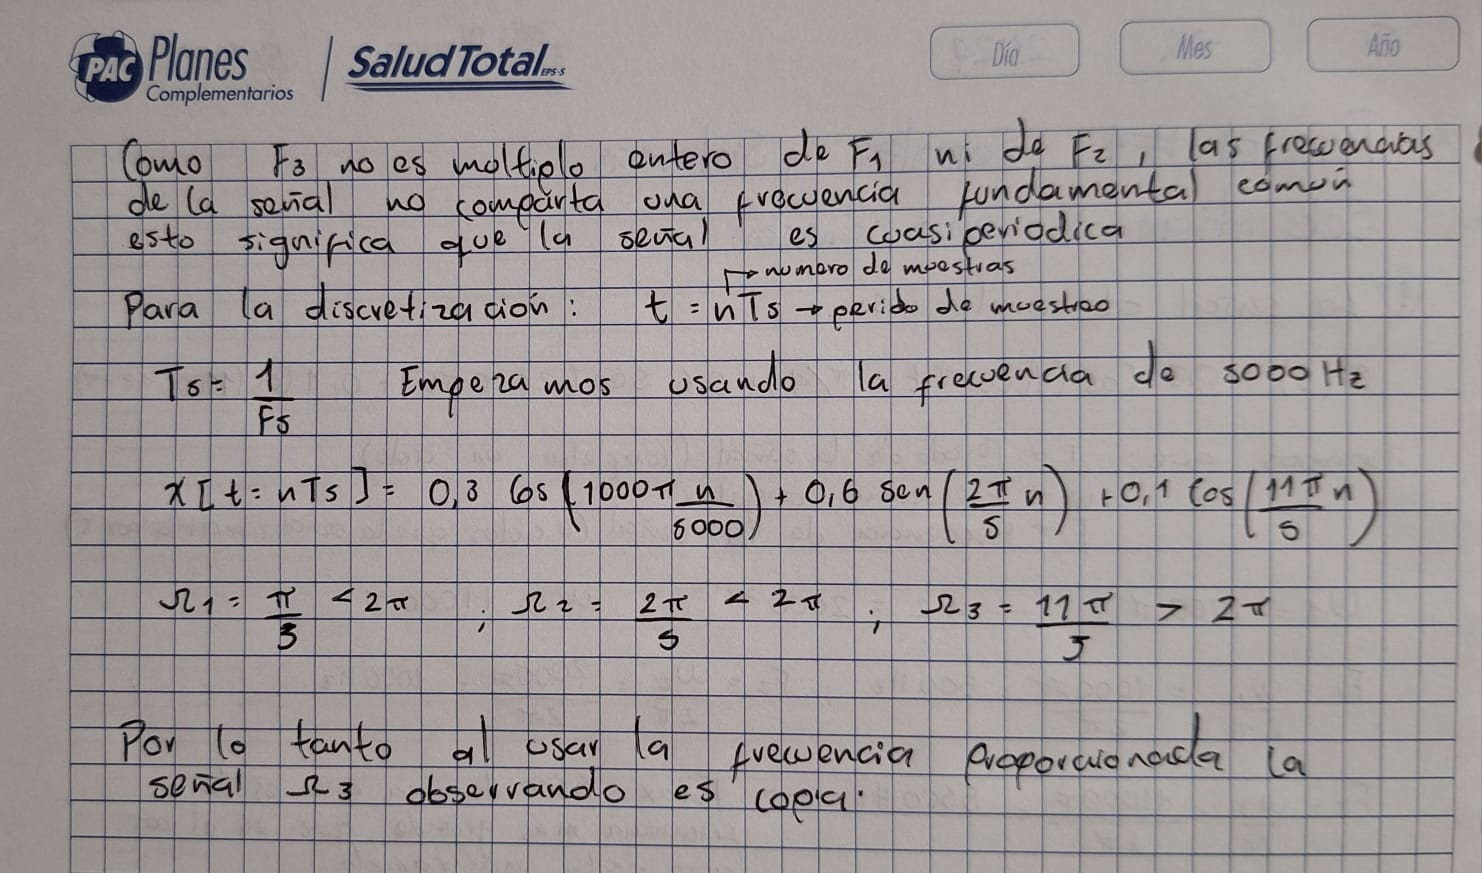

In [ ]:
# Primero importamos las librerias; usar codigos separados para no generar algun errores mas adelante
import matplotlib.pyplot as plt # Importar la libreria matplotlib
import numpy as np # Importar la libreria numpy  para hacer arrreglos
from scipy.spatial.distance import cdist # Importamos la funcion cdist de scipy.spatial.distance para calcula distancias

In [ ]:
# Definir las variables de la señal

A1 = 0.3 #amplitud 1
A2 = 0.6 #amplitud 2
A3 = 0.1 #amplitud 3

# Definir las velocidades angulares

W1 = 1000*np.pi #velocidad angular 1
W2 = 2000*np.pi #velocidad angular 2
W3 = 11000*np.pi #velocidad angular 3

K1 = -np.pi/4 #fase 1
K2 = 0 #fase 2
K3 = -np.pi # fase3

# Definir las frecuencias y los periodos
F1 = (W1/(2*np.pi)) #frecuencia 1
F2 = (W2/(2*np.pi)) #frecuencia 2
F3 = (W3/(2*np.pi)) #frecuencia 3

T1 = 1/F1 #periodo 1
T2 = 1/F2 #Periodo 2
T3 = 1/F3 #Periodo 3

T = (1/500) # Periodo de la señal cuasiperiodica

# Imprimir las frecuencias y periodos
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", T1, T2, T3)

In [ ]:
# Definir la frecuencia y periodo de muestreo
Fs = 5*max(F1,F1,F3)# frecuenia de muestreo
Ts = 1/Fs # periodo de muestreo
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

In [ ]:
# Definir el vector tiempo
ti = 0 # empezar en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

# se construye la señal
x1 = A1*np.cos(W1*tv+K1)
x2 = A2*np.sin(W2*tv+K2)
x3 = A3*np.cos(W3*tv+K3)
x = x1 + x2 + x3
plt.figure(figsize=(18, 9))
plt.plot(tv,x,'r',label='$x(t) = 0.3\cos(1000π*t-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,x1,'g',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,x2,'y',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,x3,'b',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Tendremos el cero y pendiente que es el proceso de digitalizacion de la señal segun el ejercicio 1
# Reutilizamos la funcion vista en clases
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

# Tendremos el cero y pendiente del profesor
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax)
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nbits = 5 #numero de bits que pide el ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion

# Función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.signal import convolve
from P1_model import system_


# Prueba de linealidad
a = signal_u # Asigna valor entrada
a1 = 2 # Asigna valor escala
y3 = my_system.predict(a1*a) # Escala la señal de entrada

#Respuesta del sistema escalada a la entrada original
y1 = a1*y_u

# Graficar la salida del sistema
plt.figure()
plt.plot(t, y1, label='Salida escalada: a1 * T(x(t))')
plt.legend()
plt.grid()
plt.show()
plt.plot(t, y3, label='T(a1 * x(t))', linestyle='--')
plt.title('Prueba de Linealidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.signal import convolve
from P1_model import system_

# Prueba de invariancia en el tiempo
shift = 0.005  # Número de muestras para desplazar

# Señal desplazada y salida
shifted_signal = np.heaviside(t-shift,1) # Crea una versión desplazada de la función escalón
y_shifted = my_system.predict(shifted_signal) # Introduce la señal desplazada en el sistema

# Graficar la salida del sistema
plt.subplot(2, 1, 1)
plt.stem(t,shifted_signal, label='Señal de entrada desplazada')
plt.legend()
plt.grid()
plt.show()
plt.subplot(2, 1, 1)
plt.stem(t,y_shifted, label='Salida del sistema a la señal desplazada')
plt.legend()
plt.grid()
plt.show()

Ya comprobado que nos da que es lineal y que es invariante en el tiempo.
Determinamos su respuesta al impulso:

In [ ]:
# Asegurarse de que t y y_u tengan la misma longitud
min_len = min(len(t), len(y_u))
t = t[:min_len]
y_u = y_u[:min_len]

h_n = np.diff(shifted_signal) * fs  #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustar el tiempo a la longitud de h_n
t_adjusted = t[:-1]  # Eliminar el último elemento de t para que coincida con h_n

# Graficar la respuesta al impulso
plt.figure()
plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Respuesta al Impulso Discreto')
plt.legend()
plt.grid()
plt.show()


In [ ]:
n = np.round(t*fs)
n

In [ ]:
n = t*Fs # "n" Variable se calcula para representar los índices de tiempo discreto de la señal
         # "t"  Representa el vector de tiempo continuo definido
         # "Fs" Representa la frecuencia de muestreo
x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n) # x_n en tiempo
plt.plot(n, x_n, 'g', label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()

print(x_n)

In [ ]:
# Realizar la convolución
# x_n (la señal de entrada) y h_n (la respuesta al impulso del sistema)
y_output = np.convolve(x_n, h_n, mode='same') / fs # mode='same' indica que la salida (y_output) tendrá la misma longitud que la señal de entrada (x_n)

# Visualización de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()

# Interacciones con IA

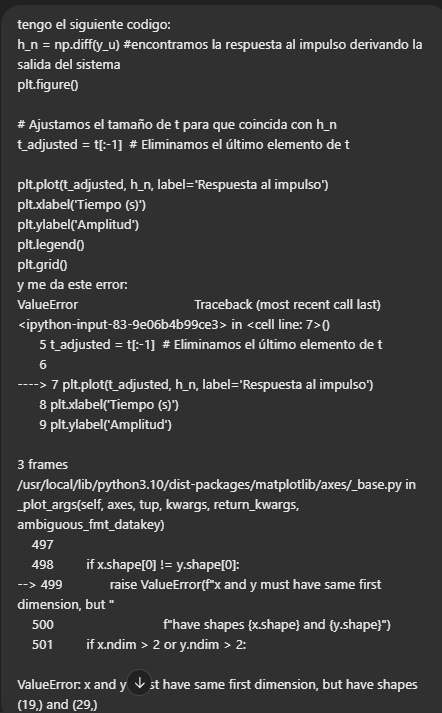

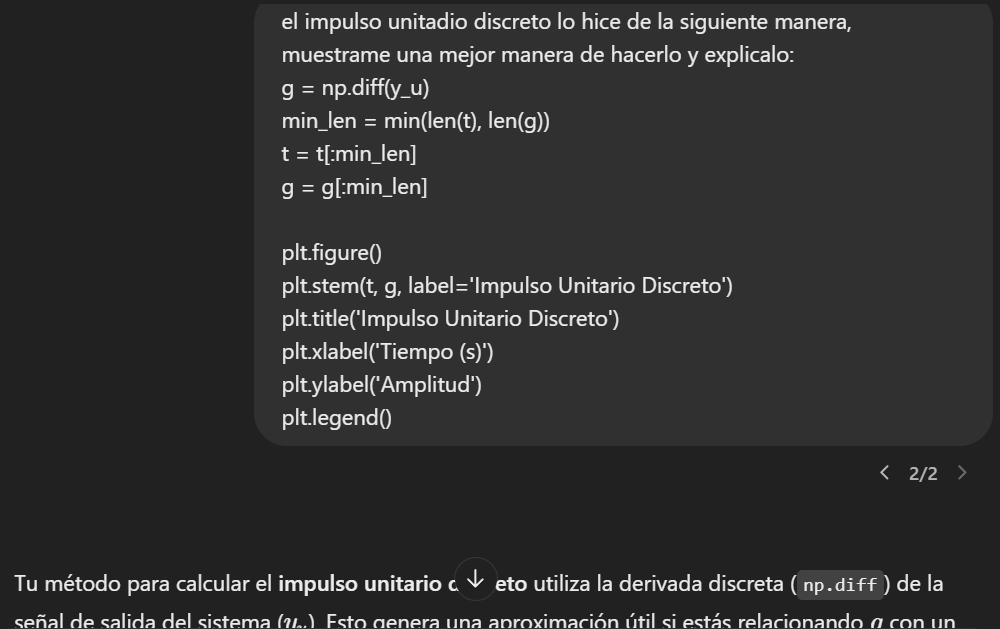

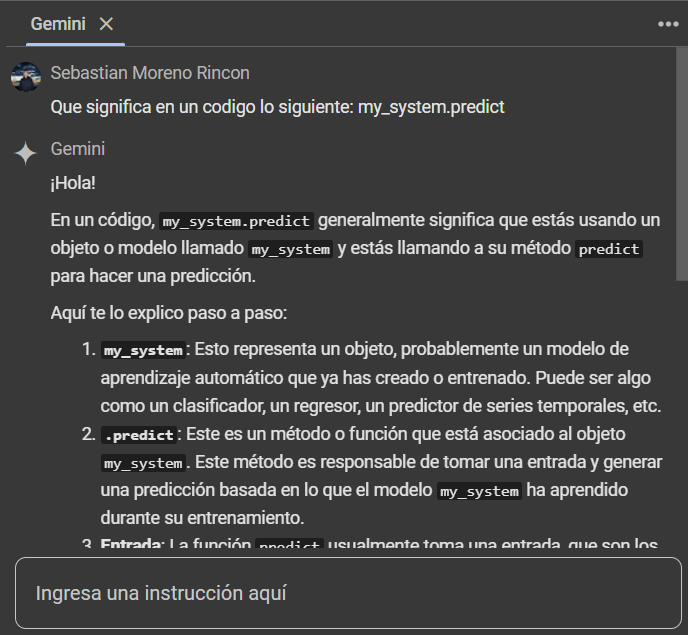